# **Brain Stroke Analysis**

Stroke is a neurological disorder characterized by blockage of blood vessels. Clots form in the brain and interrupt blood flow, clogging arteries and causing blood vessels to break, leading to bleeding. Rupture of the arteries leading to the brain during stroke results in the sudden death of brain cells owing to a lack of oxygen. Once brain cells die, they generally do not regenerate and devastating damage may occur, sometimes resulting in physical, cognitive and mental disabilities. It is crucial that proper blood flow and oxygen be restored to the brain as soon as possible.Stroke is the second leading cause of death and a major contributor to disability worldwide. The prevalence of stroke is highest in developing countries, with ischemic stroke being the most common type.

**About this dataset**

id: Unique identifier

gender: Gender of the patient (Male, Female, Other)

age: Age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: Yes if the patient is married, No if the patient is not married

work_type: Profession of the patient (children, Govt_job, Never_worked, Private, Self-employed)

Residence_type: Residence category of the patient (Rural, Urban)

avg_glucose_level: Average glucose level in blood of the patient
bmi: Body Mass Index of the patient

smoking_status: Smoking status of the patient (formerly smoked, never smoked, smokes, Unknown). Unknown in smoking_status means that the information is unavailable for this patient

stroke: 1 if the patient had a stroke or 0 if not

# Importing libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

#modelling libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

In [59]:
#load the data
stroke=pd.read_csv('/content/healthcare-dataset-stroke-data (4).csv')

In [4]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
stroke.shape

(5110, 12)

In [9]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **Missingness in the data**

In [5]:
stroke.isnull().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

Only one column(the bmi column)  has missing values.

<Axes: >

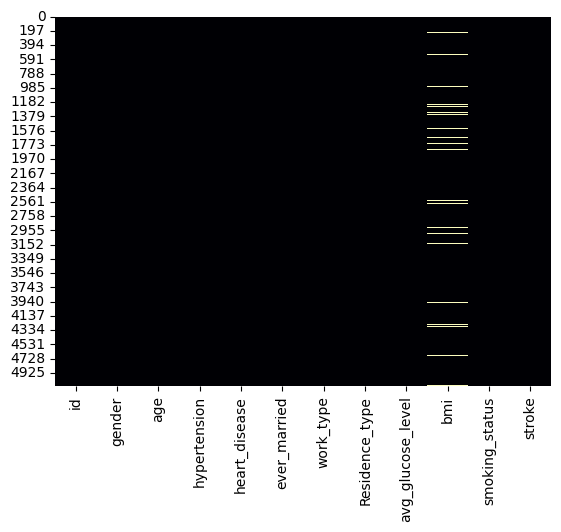

In [6]:
sns.heatmap(stroke.isnull(),cmap = 'magma',cbar = False)

In [60]:
#drop irrelevant columns like the id columns which will not used for modelling
stroke=stroke.drop(columns='id')

# **Checking for duplicates**

In [61]:
#checking if there are any duplicates in the data
stroke.duplicated().sum()

0

# **Exploring the Data**

# **Univariate Analysis**

Target variable

Patients can be divided according to the either stroke and non-stroke pateints. We can compare this two classes and check for class imbalance

In [34]:
# calc frequencies
target_count = stroke['stroke'].value_counts()
print(target_count)
print()
print('Percentage of strokes [1]:', np.round(100*target_count[1] / target_count.sum(),2), '%')

stroke
0    4861
1     249
Name: count, dtype: int64

Percentage of strokes [1]: 4.87 %


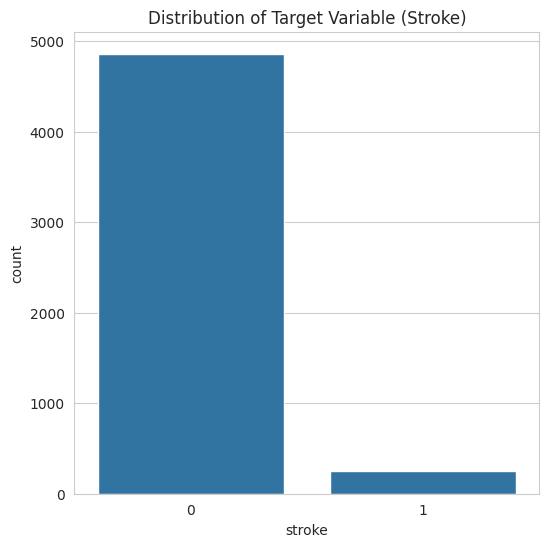

In [35]:
# Set the style of all graphs to seaborn
sns.set_style("whitegrid")

# Plot the target variable 'stroke'
plt.figure(figsize=(6, 6))
sns.countplot(x=stroke['stroke'])
plt.title('Distribution of Target Variable (Stroke)')
plt.show()

The target variable 'stroke' is highly imbalanced with a lot more instances of class 0 (no stroke) than class 1 (stroke). Patients with strokes make up only 4.87 % of the data set. This is an important observation as it will affect the choice of machine learning model and evaluation metric

Categorical columns

In [36]:
#categorical columns
#stroke, hypertension, and heart diasease columns are binary categorical columns with 0 or 1 to reprsent the presence(1) or absence(0)  of disease
categorical_var=['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status','hypertension','heart_disease']

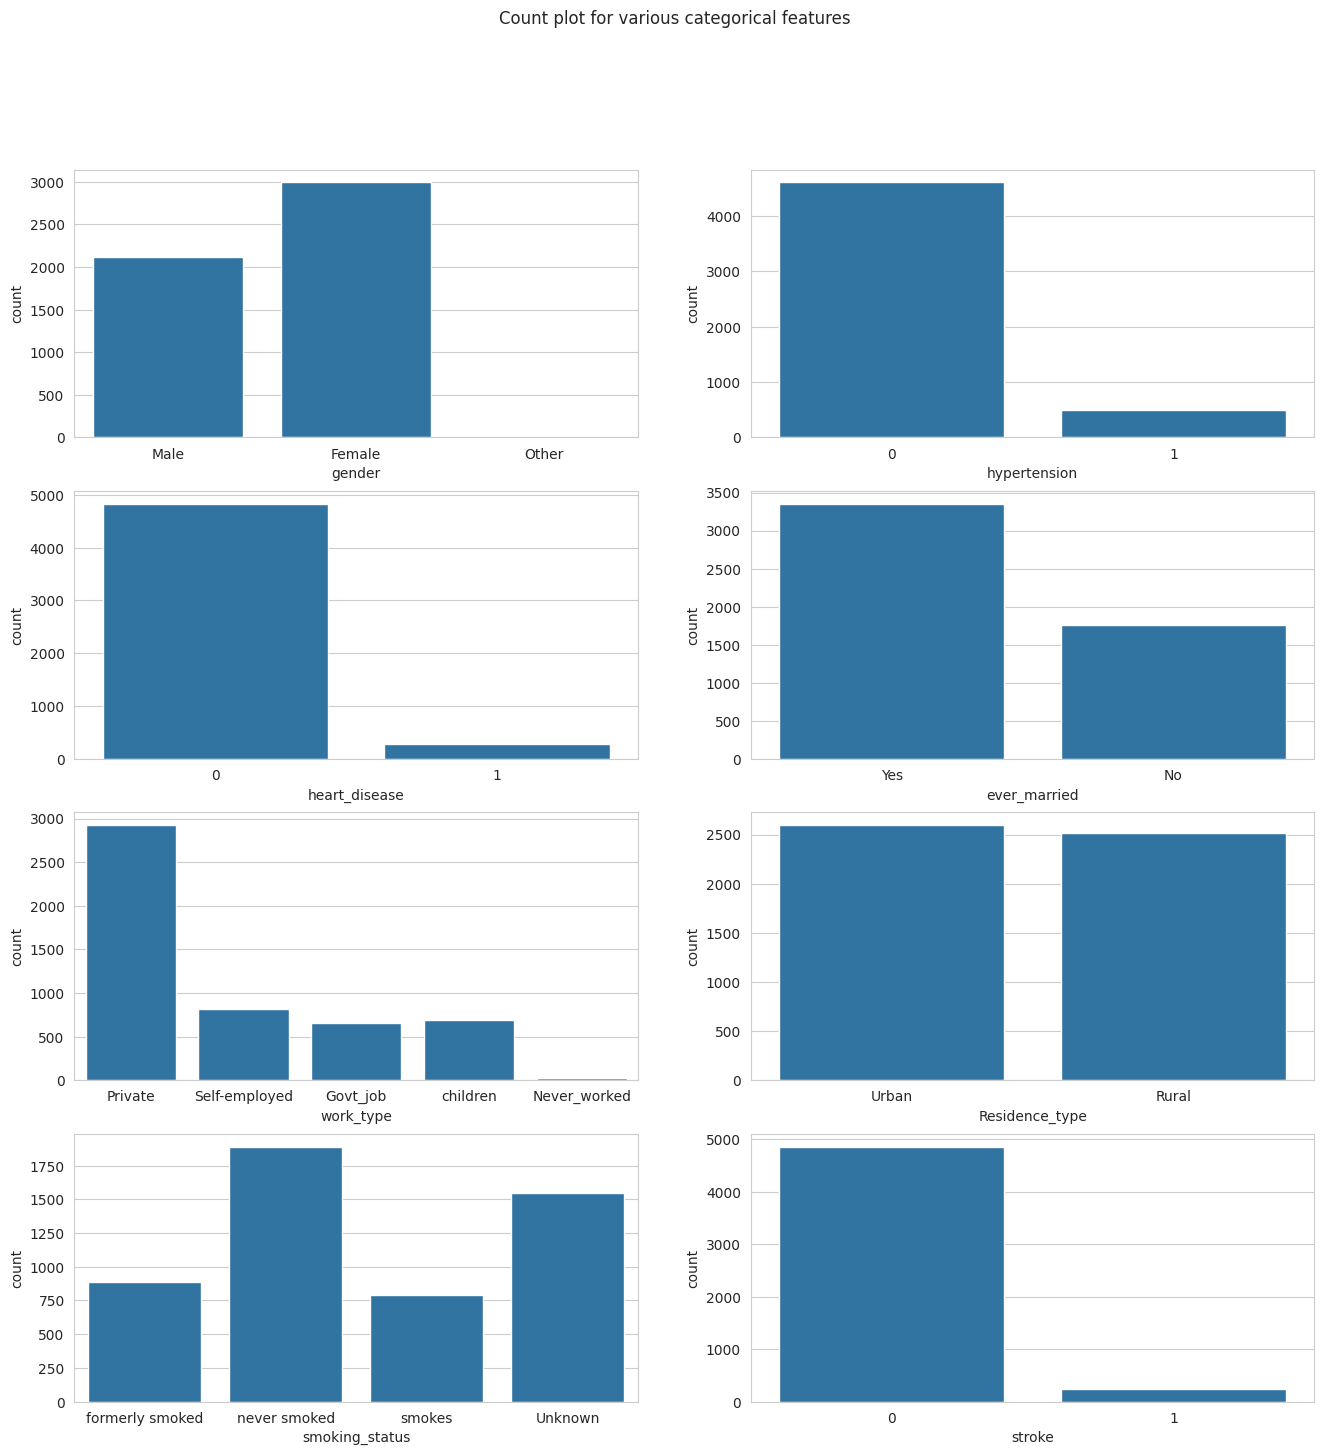

In [37]:
#countplots of categorical variables
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=stroke,x='gender')
sns.countplot(ax=axes[0,1],data=stroke,x='hypertension')
sns.countplot(ax=axes[1,0],data=stroke,x='heart_disease')
sns.countplot(ax=axes[1,1],data=stroke,x='ever_married')
sns.countplot(ax=axes[2,0],data=stroke,x='work_type')
sns.countplot(ax=axes[2,1],data=stroke,x='Residence_type')
sns.countplot(ax=axes[3,0],data=stroke,x='smoking_status')
sns.countplot(ax=axes[3,1],data=stroke,x='stroke')

plt.show()

observations:

gender: There are more female than male patients, and a very small number of patients identify as Other.

hypertension: The majority of patients do not have hypertension.

heart_disease: The majority of patients do not have heart disease.

ever_married: Most of the patients have been married at least once.

work_type: Most of the patients are in the Private work category. There are also significant numbers in Self-employed and children. The categories Govt_job and Never_worked have fewer patients.

Residence_type: The number of patients living in urban and rural areas is almost equal.

smoking_status: Most of the patients have never smoked. The categories formerly smoked and smokes have fewer patients. There's a significant portion of patients with Unknown smoking status.

Numeric Variables

In [38]:
#numerical columns
numerical_var= ['age', 'avg_glucose_level','bmi']

Does age makes one more likely to suffer a stroke? What about gender? Or BMI?

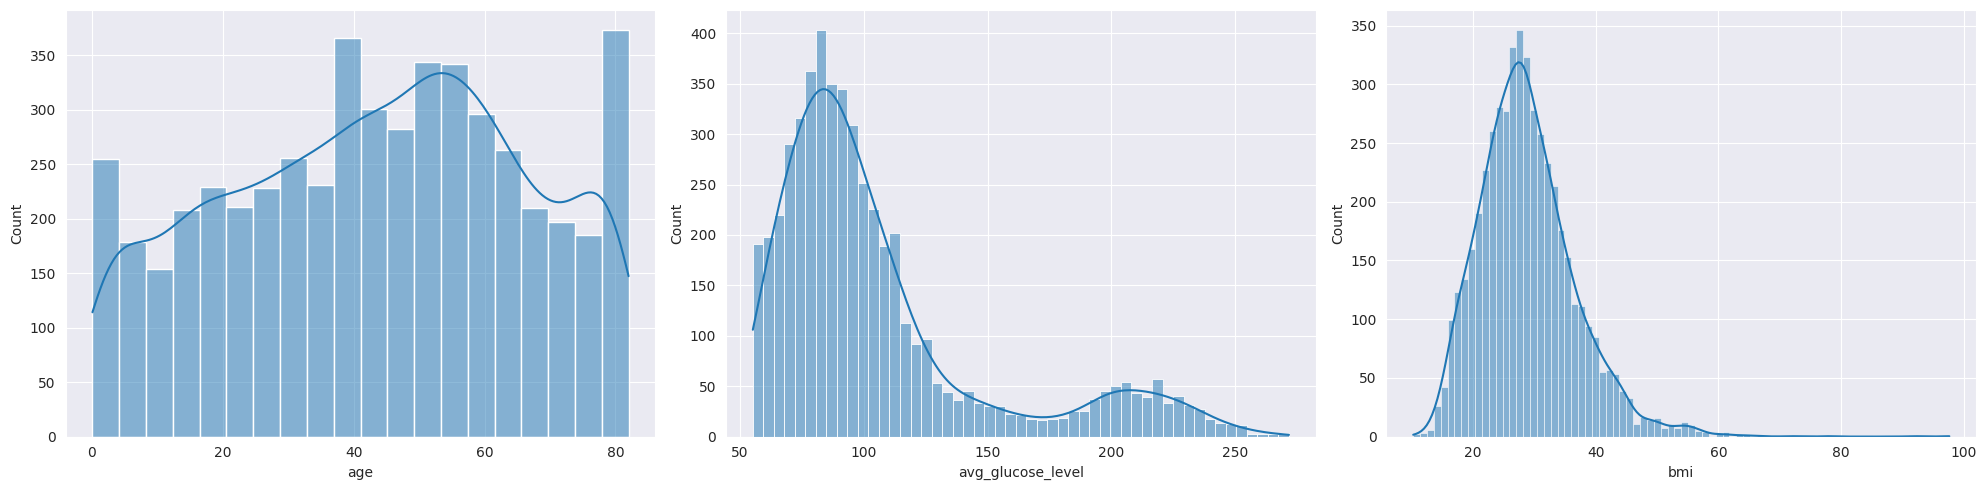

In [39]:
# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(numerical_var, axs.flatten()):
    sns.histplot(stroke[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

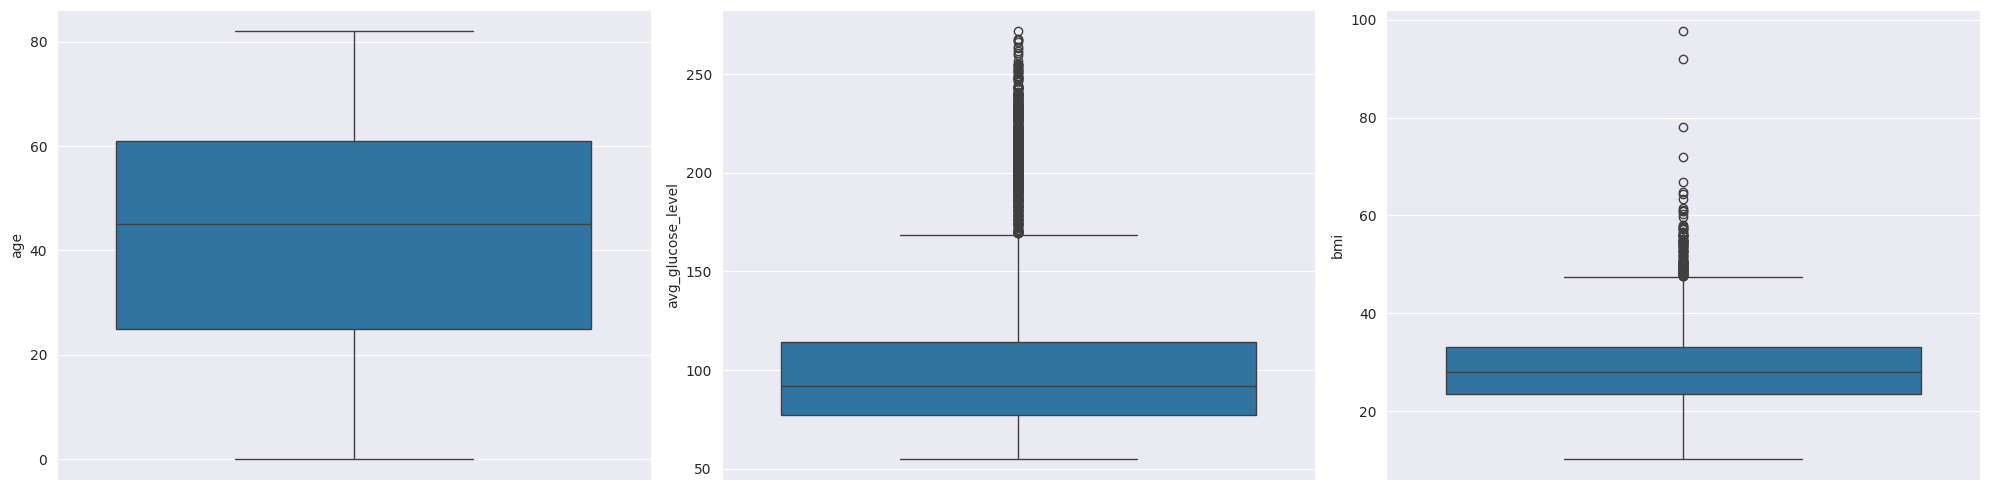

In [40]:
# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(numerical_var, axs.flatten()):
    sns.boxplot(stroke[var], ax=subplot)

plt.tight_layout()
plt.show()


There are a lot of outliers in avg_glucose_level and bmi.
The outliers make the distribution curve of both the features highly skewed towards right.As such it woukd be rational to fill the missing values in the BMI column with the **median.**


The numerical features have skewness in different degrees.
 We will deal with different scale and skewness during the modeling by using **normalization. **

avg_glucose_level increases with age and similarly leads to more chances of stroke.

The stroke class is highly imbalanced which has to be taken of

# **Bivariate Analysis**

Relationship between the target variable stroke and each of the other variables.

categorical features

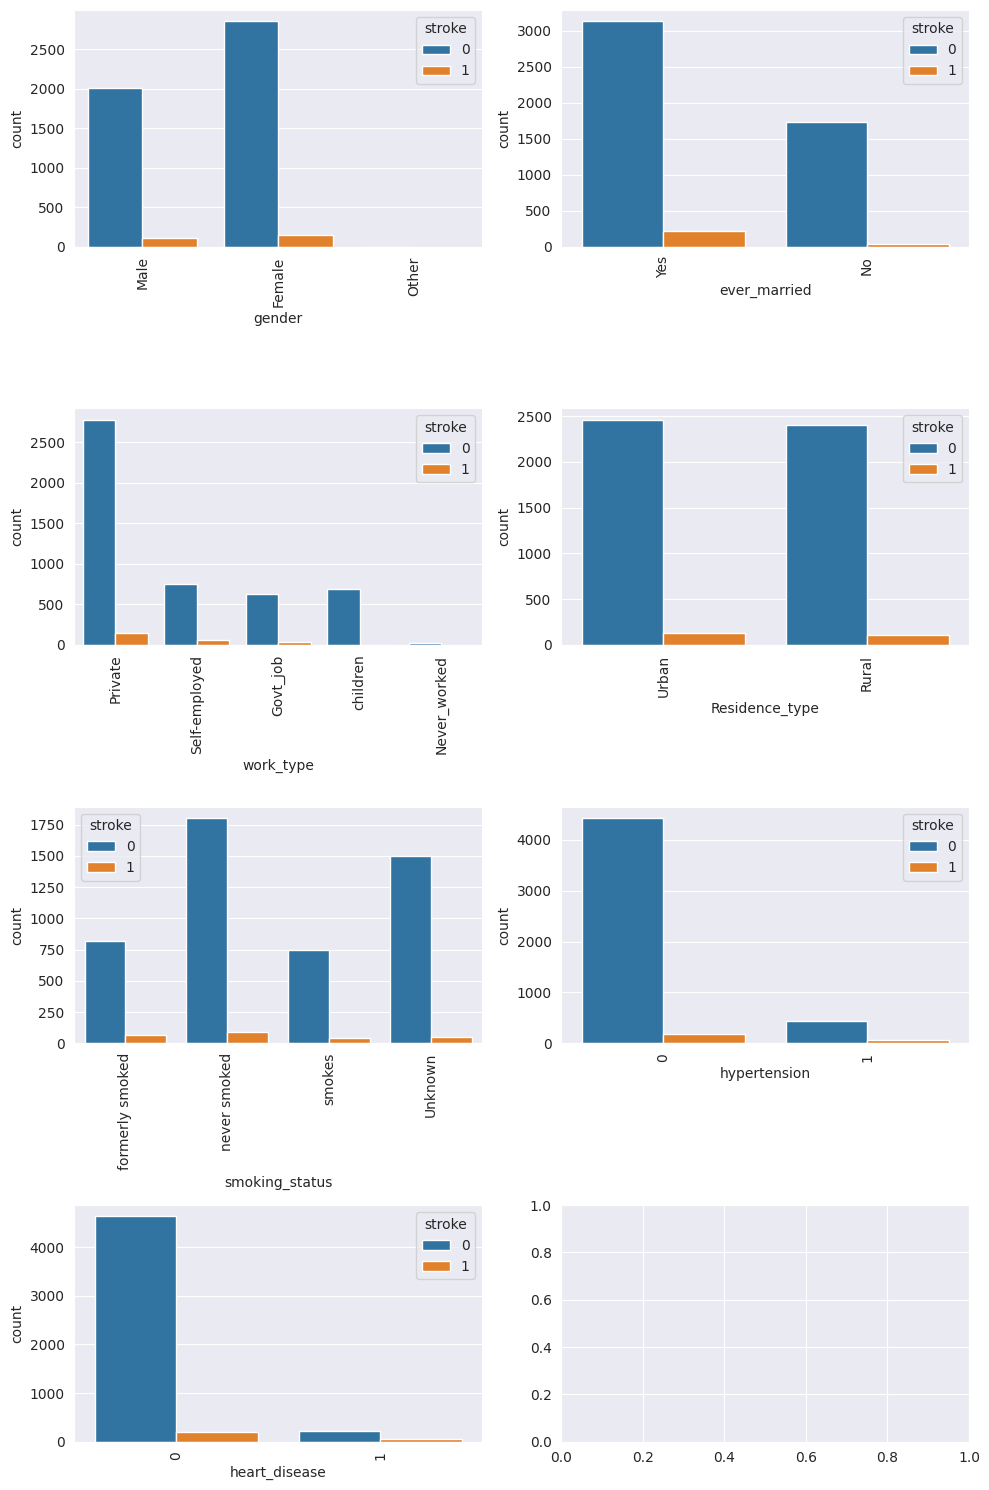

In [43]:
# Plot the categorical variables against the target variable 'stroke'
fig, axs = plt.subplots(4, 2, figsize=(10, 15))

for var, subplot in zip(categorical_var, axs.flatten()):
    sns.countplot(x=stroke[var], hue=stroke['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

#observations:

gender: Both males and females have a similar proportion of stroke cases, with males having slightly more. The Other category has no stroke cases, but this could be due to the very small sample size for this category.

ever_married: Those who have been married have a higher proportion of stroke cases than those who have not.

work_type: Patients who are self-employed or work in private jobs have a higher proportion of stroke cases compared to other work types

Residence_type: The proportion of stroke cases is almost equal for both urban and rural residents.

smoking_status: The proportion of stroke cases is higher for patients who formerly smoked or currently smoke compared to those who never smoked. The stroke proportion for the 'Unknown' category is lower.
hypertension: Patients with hypertension have a higher proportion of stroke cases than those without hypertension.

heart_disease: Patients with heart disease also have a higher proportion of stroke cases than those without heart disease.

ever_married: Those who have been married have a higher proportion of stroke cases than those who have not.





numerical variables

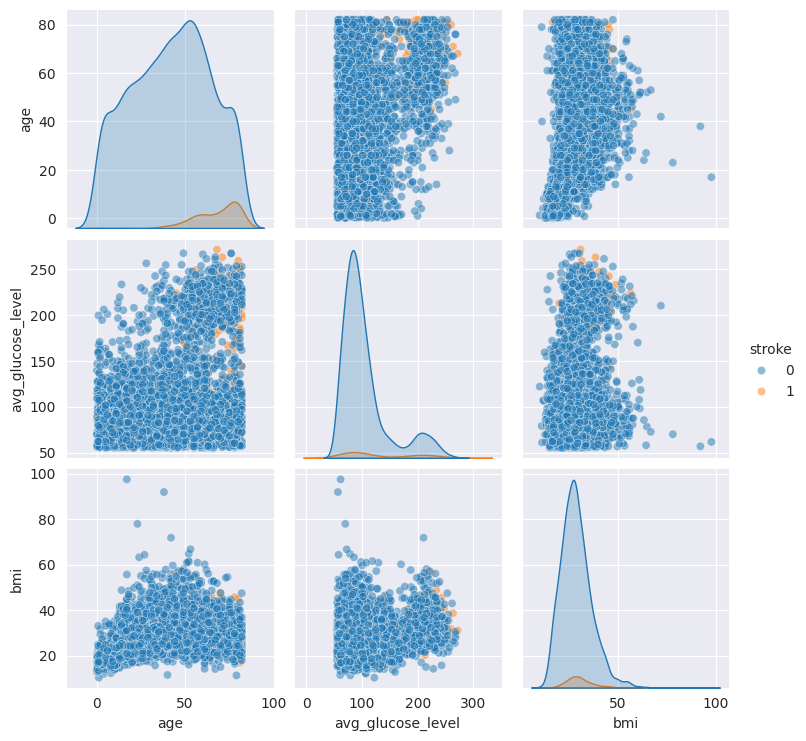

In [44]:
#Subset the data for the pairplot using the numerical variablesand the target variable
subset = stroke[['age', 'avg_glucose_level', 'bmi', 'stroke']]
# Convert 'stroke' to a categorical variable for the pairplot
subset['stroke'] = subset['stroke'].astype('category')

# Generate the pairplot
sns.pairplot(subset, hue='stroke', plot_kws={'alpha': 0.5})

plt.show()

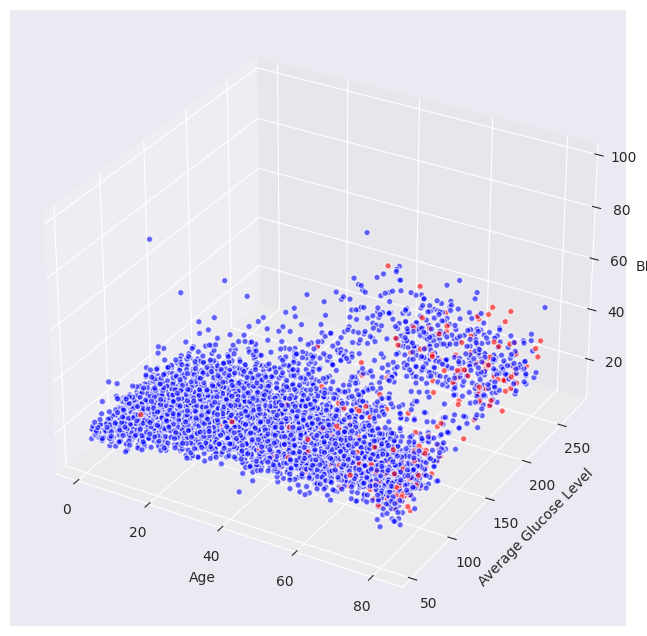

In [45]:
# Create a color map for the 'stroke' variable
colors = stroke['stroke'].map({0:'blue', 1:'red'})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(stroke['age'], stroke['avg_glucose_level'], stroke['bmi'], c=colors, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
plt.show()

observations:


age vs avg_glucose_level: There's no clear relationship between age and average glucose level. However, stroke patients (denoted in orange) tend to be older and have higher glucose levels.

age vs bmi: There's no clear relationship between age and BMI. Stroke patients tend to be older, but their BMI doesn't differ significantly from non-stroke patients.

avg_glucose_level vs bmi: There's no clear relationship between average glucose level and BMI. However, stroke patients tend to have higher glucose levels, regardless of their BMI

As such we can futher explore the relationship between these variables using a correlation matrix.

imputing the missing values in the  BMI colums

In [62]:
#since the data in the bmi colum has outliers we can impute the median.
stroke['bmi']=stroke['bmi'].fillna(stroke['bmi'].median())

Correlation heatmap

Before we get get a correlation heat, we can encode the categorical columns. We will use one hot encoding because most categorical don't have a lot of unique values.

In [63]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform on categorical columns
encoded_data = encoder.fit_transform(stroke[categorical_cols])

# Create DataFrame with encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))
stroke = stroke.drop(columns=categorical_cols)
stroke_encoded = pd.concat([stroke, encoded_df], axis=1)

stroke_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


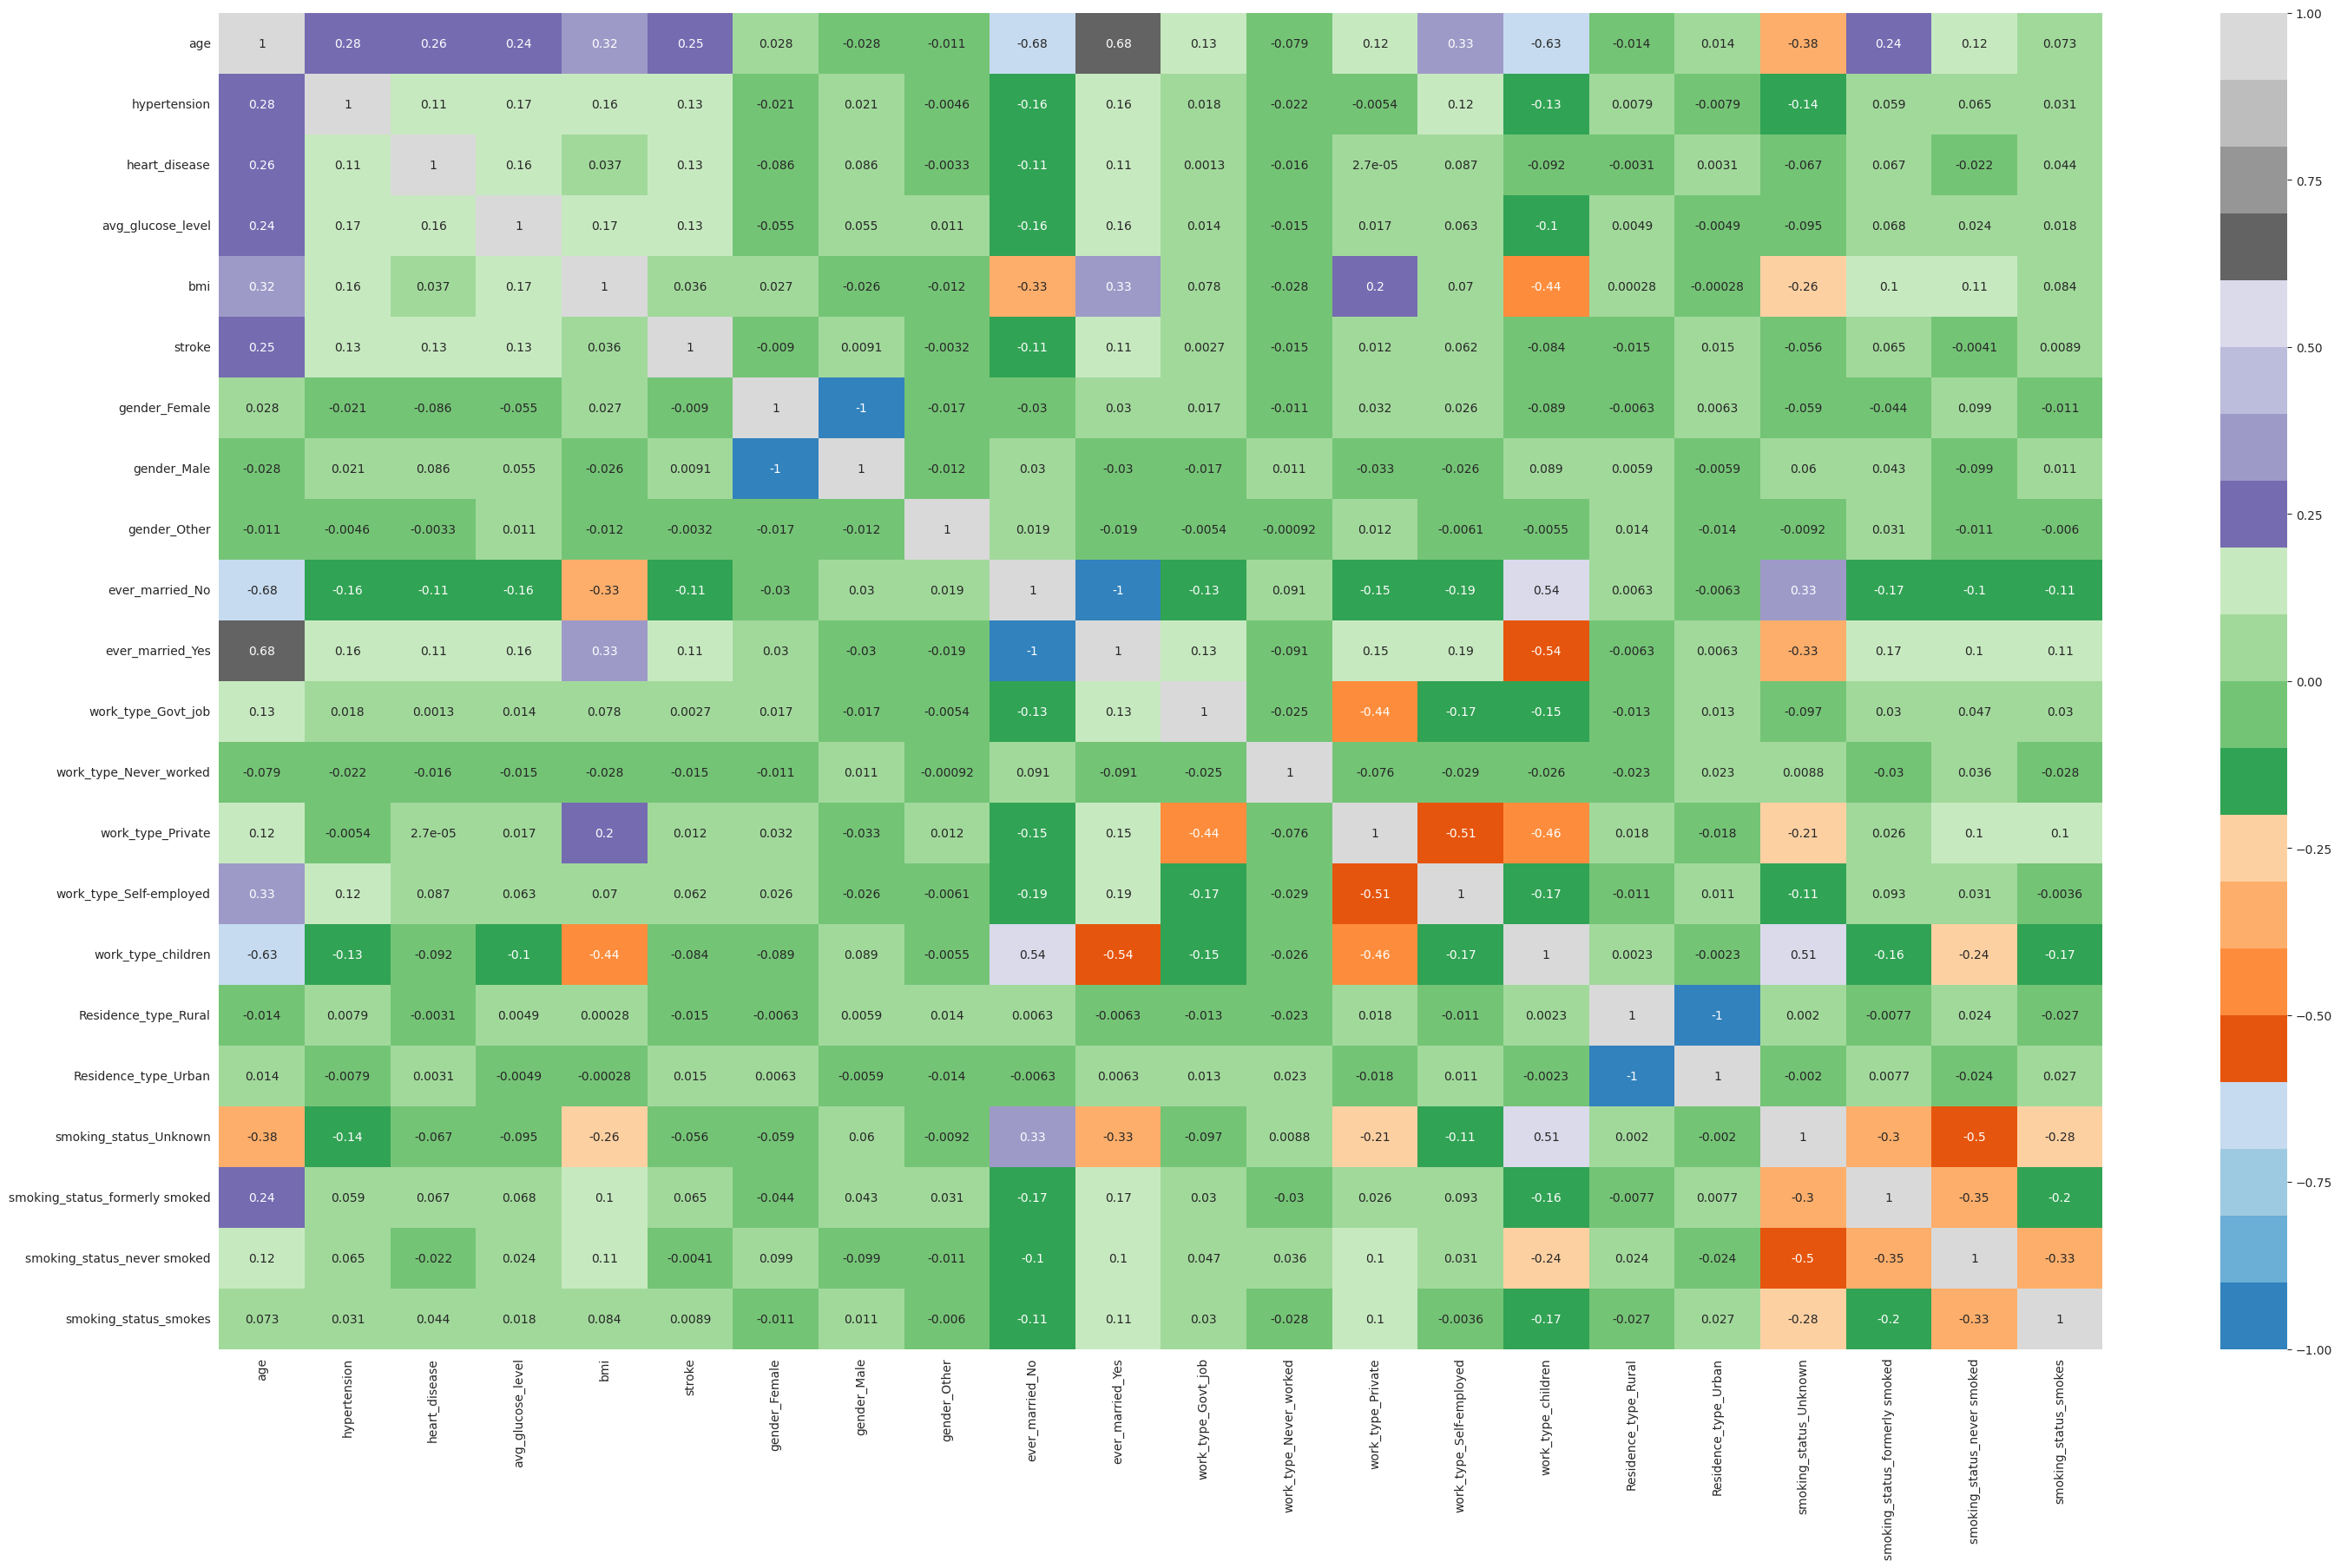

In [64]:
#plotting the correlation matrix
plt.figure(figsize=(35,20))
sns.heatmap(stroke_encoded.corr(),annot=True,cmap="tab20c")
plt.show()

Outlier Handling

In [71]:
#Data normalization
x = stroke_encoded.drop(["stroke"],axis =1)
y = stroke_encoded["stroke"]

sc = RobustScaler()
x = sc.fit_transform(x)

splitting the data

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (4088, 21), (4088,)
Shape of testing data : (1022, 21), (1022,)


# **Modelling**

let's take the unabalnced data and used decision tree on it.

In [75]:
#modelling with a decision tree

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)


In [76]:
print(confusion_matrix(y_test,y_pred_gini))
print('The classification report is:\n{:}'.format(classification_report(y_test,y_pred_gini)))

[[956   4]
 [ 61   1]]
The classification report is:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.20      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.57      0.51      0.50      1022
weighted avg       0.90      0.94      0.91      1022

